In [77]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble  import RandomForestClassifier 
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [78]:
data = pd.read_excel('C:/Users/hp/OneDrive/Desktop/FUTURE_COUNTRY_MODEL_PREDICTION/hdi_data.xlsx')
print(data.tail())

                      Country Human development level Gender Inequality Index  \
188                      Chad                     Low                   0.671   
189                     Niger                     Low                   0.609   
190  Central African Republic                     Low                      ..   
191               South Sudan                     Low                      ..   
192                   Somalia                     Low                   0.674   

    Rank Maternal mortality ratio  Adolescent birth rate  \
188  163              1063.493291                135.678   
189  154               441.072548                168.040   
190   ..               835.266007                158.998   
191   ..              1222.530912                 97.418   
192  164               620.682321                116.067   

    Share of seats in parliament (% held by women) F_secondary_educ  \
188                                      25.888325         3.666509   
189       

In [79]:
# Replacing string values like ".." with NaN
data.replace("..", pd.NA, inplace=True)
print(data)

#filter the data for a specific country (e.g., Tanzania)
print(data[data['Country'] == 'Tanzania'])


                      Country Human development level Gender Inequality Index  \
0                 Switzerland               Very high                   0.018   
1                      Norway               Very high                   0.012   
2                     Iceland               Very high                   0.039   
3      Hong Kong, China (SAR)               Very high                    <NA>   
4                     Denmark               Very high                   0.009   
..                        ...                     ...                     ...   
188                      Chad                     Low                   0.671   
189                     Niger                     Low                   0.609   
190  Central African Republic                     Low                    <NA>   
191               South Sudan                     Low                    <NA>   
192                   Somalia                     Low                   0.674   

     Rank Maternal mortalit

In [80]:
# Checking for missing value again
missing_values = data.isnull().sum()
print("Missing values after replacing " " with NaN:")
print(missing_values)

Missing values after replacing  with NaN:
Country                                             0
Human development level                             0
Gender Inequality Index                            27
Rank                                               27
Maternal mortality ratio                           10
Adolescent birth rate                               0
Share of seats in parliament (% held by women)      2
F_secondary_educ                                   15
M_secondary_educ                                   15
F_Labour_force                                     11
M_Labour_force                                     11
Income_per_capita                                 193
dtype: int64


In [81]:
# Replace NaN values with 0 for specific columns
columns_to_fill = ['Gender Inequality Index', 'Rank', 'Maternal mortality ratio',
                   'Share of seats in parliament (% held by women)',
                   'F_secondary_educ', 'M_secondary_educ', 'F_Labour_force', 'M_Labour_force']

In [82]:
# Fill missing values with 0 in the specified columns
data[columns_to_fill] = data[columns_to_fill].fillna(0)

# Check if missing values have been filled with 0
print(data.isnull().sum())

Country                                             0
Human development level                             0
Gender Inequality Index                             0
Rank                                                0
Maternal mortality ratio                            0
Adolescent birth rate                               0
Share of seats in parliament (% held by women)      0
F_secondary_educ                                    0
M_secondary_educ                                    0
F_Labour_force                                      0
M_Labour_force                                      0
Income_per_capita                                 193
dtype: int64


C:\Users\hp\AppData\Local\Temp\ipykernel_3868\1071976643.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[columns_to_fill] = data[columns_to_fill].fillna(0)


In [83]:
# Define numerical col
numerical_cols = [ 'Gender Inequality Index','Rank', 'Maternal mortality ratio','Adolescent birth rate','Share of seats in parliament (% held by women)']

In [84]:
#  data cleaning
for col in numerical_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

In [85]:
data.dropna(subset=numerical_cols, inplace=True)

In [86]:
numerical_cols = ['Gender Inequality Index','Rank', 'Maternal mortality ratio',  'Adolescent birth rate', 'Share of seats in parliament (% held by women)' ]


In [87]:
data[numerical_cols] = data[numerical_cols].astype(float)

In [88]:
imputer_num = SimpleImputer(strategy='mean')
data[numerical_cols] = imputer_num.fit_transform(data[numerical_cols])


In [89]:
label_encoder = LabelEncoder()
data['Country'] = label_encoder.fit_transform(data['Country'])  

In [90]:
label_encoder = LabelEncoder()
data['Human development level'] = label_encoder.fit_transform(data['Human development level'])

In [91]:
X = data.drop(['Country', 'Human development level'], axis=1)
y = data['Human development level']

In [92]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [93]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [94]:
# Create a random forest classifier (you can adjust hyperparameters as needed)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier using the training data
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [95]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)


In [96]:
# Evaluate the model using accuracy score and classification report
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

classification_report = classification_report(y_test, y_pred)
print('Classification Report:\n', classification_report)

Accuracy: 0.8717948717948718
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86        10
           1       0.75      1.00      0.86         3
           2       0.92      0.92      0.92        12
           3       0.92      0.79      0.85        14

    accuracy                           0.87        39
   macro avg       0.85      0.90      0.87        39
weighted avg       0.88      0.87      0.87        39



In [97]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler  # Import for encoding and scaling
from sklearn.preprocessing import OneHotEncoder

In [98]:
future_data = pd.read_excel('C:/Users/hp/OneDrive/Desktop/FUTURE_COUNTRY_MODEL_PREDICTION/hdi_data.xlsx')


In [99]:
future_data.dropna(subset=numerical_cols, inplace=True)

In [100]:
for col in numerical_cols:
    future_data[col] = pd.to_numeric(future_data[col], errors='coerce')

In [101]:
future_data[numerical_cols] = future_data[numerical_cols].astype(float)

In [102]:
print(data.describe(include='all'))

          Country  Human development level  Gender Inequality Index  \
count  193.000000               193.000000               193.000000   
mean    96.000000                 1.678756                 0.287886   
std     55.858452                 1.203473                 0.214858   
min      0.000000                 0.000000                 0.000000   
25%     48.000000                 0.000000                 0.078000   
50%     96.000000                 2.000000                 0.289000   
75%    144.000000                 3.000000                 0.477000   
max    192.000000                 3.000000                 0.820000   

             Rank  Maternal mortality ratio  Adolescent birth rate  \
count  193.000000                193.000000             193.000000   
mean    71.797927                137.080839              44.171036   
std     53.174199                207.469613              37.865954   
min      0.000000                  0.000000               1.571000   
25%     22

In [103]:
imputer = SimpleImputer(strategy='mean')  
data[numerical_cols] = imputer.fit_transform(data[numerical_cols])


In [104]:
# Feature scaling (optional, consider if numerical features have vastly different scales)
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])


In [105]:
# Verify column names
print(data.columns)

Index(['Country', 'Human development level', 'Gender Inequality Index', 'Rank',
       'Maternal mortality ratio', 'Adolescent birth rate',
       'Share of seats in parliament (% held by women)', 'F_secondary_educ',
       'M_secondary_educ', 'F_Labour_force', 'M_Labour_force',
       'Income_per_capita'],
      dtype='object')


In [106]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

def train_model(X_train, y_train):
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(X_train, y_train)
    return model

def predict_income(model, new_data):
    y_pred = model.predict(new_data)
    return y_pred

def main():
    # Load the preprocessed dataset (assumed to be stored in a CSV or EXCEL file)
    data = 'C:/Users/hp/OneDrive/Desktop/FUTURE_COUNTRY_MODEL_PREDICTION/hdi_data.xlsx'
    data = pd.read_excel(data)
    
     # Check for NaN or infinite values
    if data.isnull().values.any() or not np.isfinite(data.values).all():
        print("Error: Dataset contains NaN or infinite values.")
        return
    
    # Verify if Income per Capita column is present
    if 'Income_per_capita' not in data.columns:
        raise ValueError("Income per Capita column not found in the dataset.")
    return

    # Split data into features and target
    X = data.drop(columns=['Income per Capita'])  # Features
    y = data['Income per Capita']  # Target

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Train the model
    model = train_model(X_train, y_train)

    # Accept user input for new data
    new_data = pd.DataFrame(columns=X.columns)
    for column in X.columns:
        value = input(f"Enter value for {column}: ")
        new_data[column] = [float(value)]

    # Make prediction for new data
    y_pred = predict_income(model, new_data)

    # Print the prediction
    print("Predicted Income per Capita:", y_pred[0])

    # Save the new data and prediction
    new_data['Predicted Income per Capita'] = y_pred
    new_data.to_excel('C:/Users/hp/OneDrive/Desktop/FUTURE_COUNTRY_MODEL_PREDICTION/hdi_data.xlsx', index=False)
    print("New data and prediction saved.")

if __name__ == "__main__":
    main()


Error: Dataset contains NaN or infinite values.


In [107]:
import matplotlib.pyplot as plt

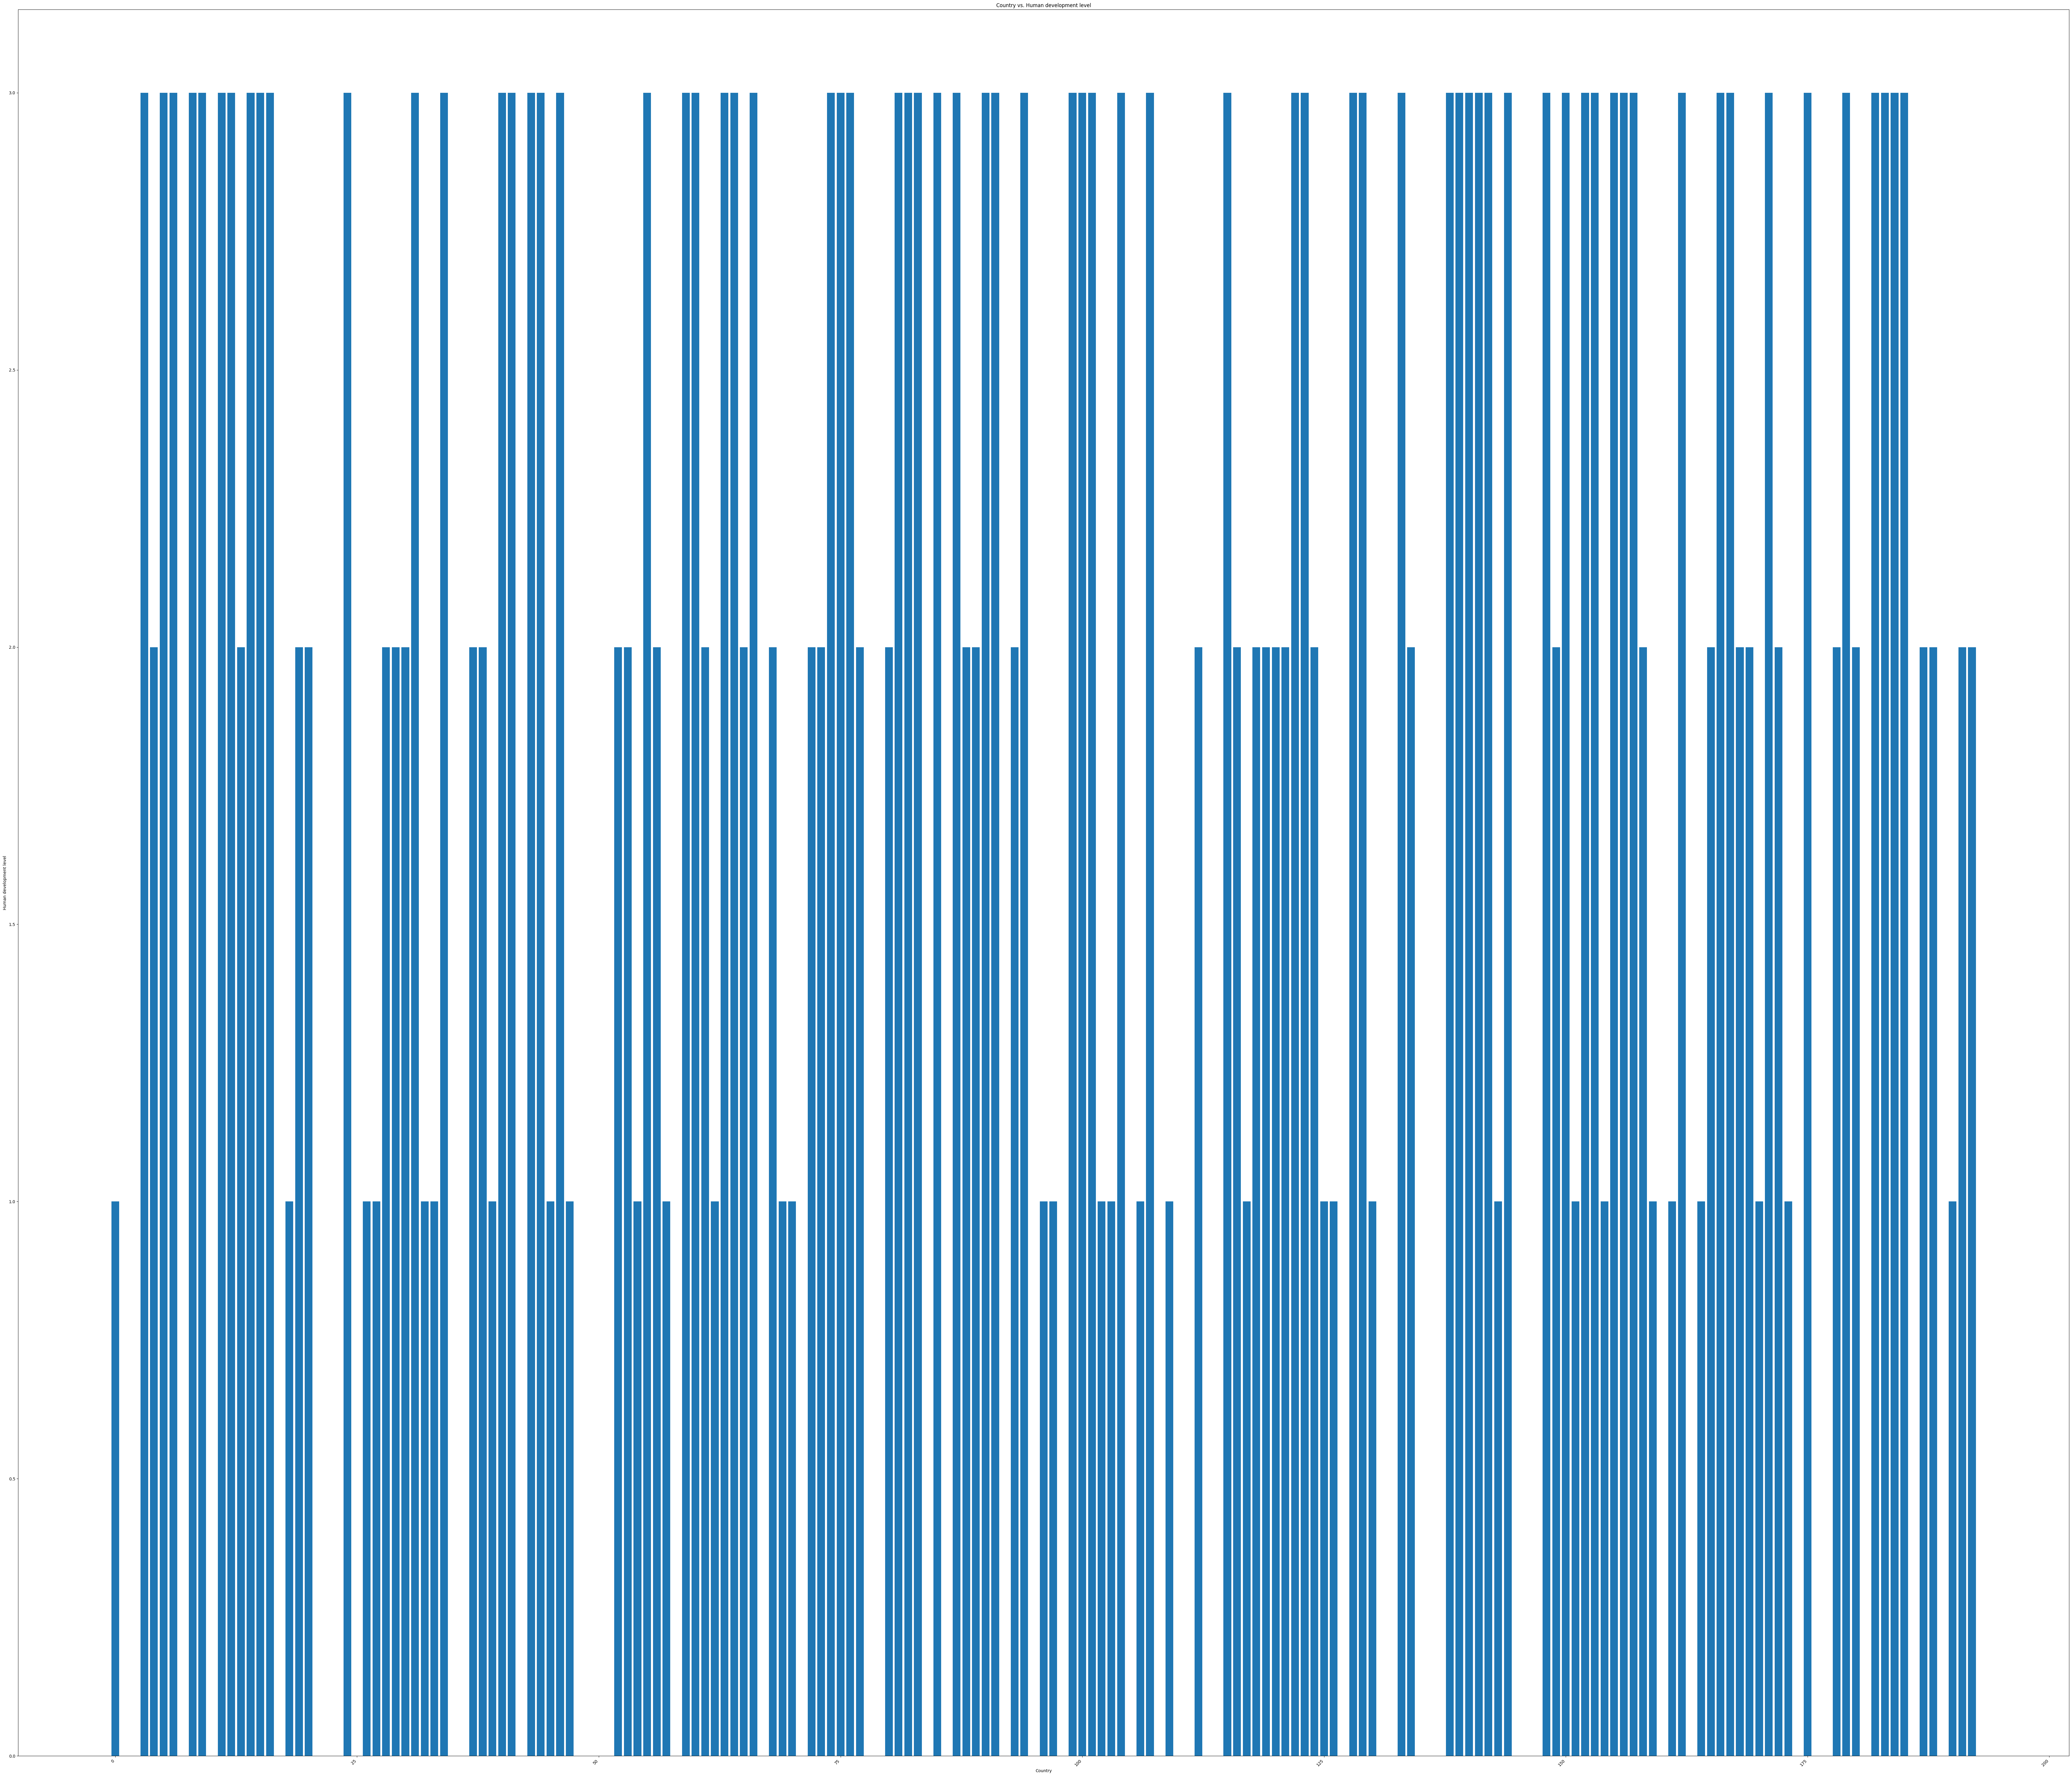

In [108]:
#visualising the data by creating a bar of a chart of country vs. predicted development level
plt.figure(figsize=(70, 60))
plt.bar(data['Country'], data['Human development level'])
plt.xlabel('Country')
plt.ylabel('Human development level')
plt.title('Country vs. Human development level')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [109]:
# Make predictions after dropping "Country"
#future_predictions = rf_classifier.predict(future_data.drop('Country', axis=1))
# future_predictions = model.predict(future_data.drop('Country', axis=1))  # Assuming model is trained


In [110]:
# future_predictions_with_country = pd.DataFrame({
#     'Country': future_data['Country'],
#     'Predicted_Development_Level': future_predictions
# })

# print("Future Predictions:")
# for prediction in future_predictions:
#     print(prediction)

In [111]:
#save the trained model to a file
joblib.dump(rf_classifier, 'model.joblib')

['model.joblib']